In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kishkindghildial/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('kaggle_movie_train.csv')

In [3]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [4]:
df.shape

(22579, 3)

In [5]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


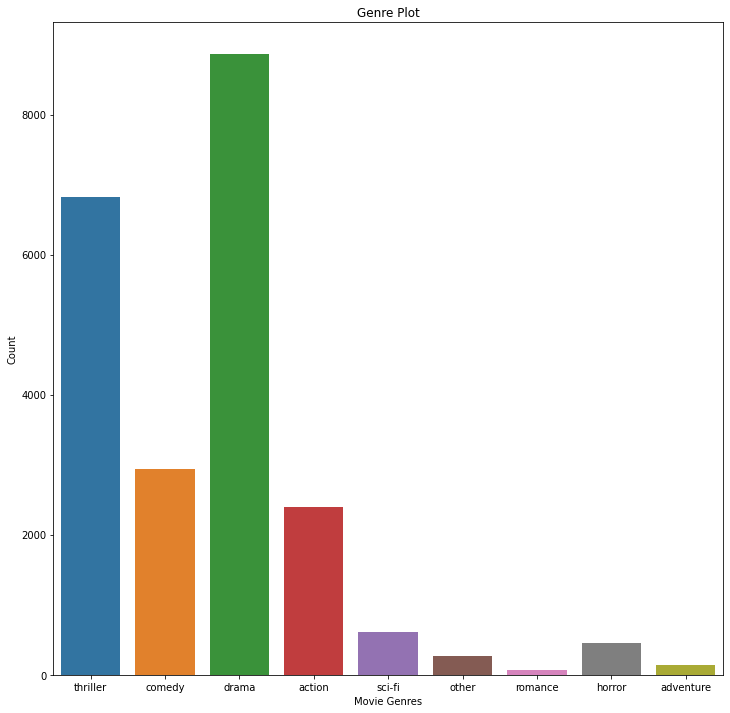

In [6]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

In [7]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [8]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 
                'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [9]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [10]:
df.drop('id', axis=1, inplace=True)

In [ ]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i]) # Cleaning special character from the dialog/script
    dialog = dialog.lower() # Converting the entire dialog/script into lower case
    words = dialog.split() # Tokenizing the dialog/script by words
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))] # Removing the stop words
    words = [ps.stem(word) for word in dialog_words] # Stemming the words
    dialog = ' '.join(words) # Joining the stemmed words
    corpus.append(dialog) # Creating a corpus

In [ ]:
corpus[0:2]

In [16]:
len(corpus)

22579

In [73]:
drama_words = []
for i in list(df[df['genre']==4].index):
    drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
    action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
    comedy_words.append(corpus[i])
    

thriller_words = []
for i in list(df[df['genre']==8].index):
    thriller_words.append(corpus[i])
 

horror_words = []
for i in list(df[df['genre']==5].index):
    horror_words.append(corpus[i])
    

scifi_words = []
for i in list(df[df['genre']==7].index):
    scifi_words.append(corpus[i])
    

romance_words = []
for i in list(df[df['genre']==6].index):
    romance_words.append(corpus[i])
    

drama = ''
action = ''
comedy = ''
thriller = ''
horror = ''
scifi = ''
romance = ''

for i in range(0, 5):
    drama += drama_words[i]
    action += action_words[i]
    comedy += comedy_words[i]
    thriller += thriller_words[i]
    horror +=horror_words[i]
    scifi +=scifi_words[i]
    romance +=romance_words[i]

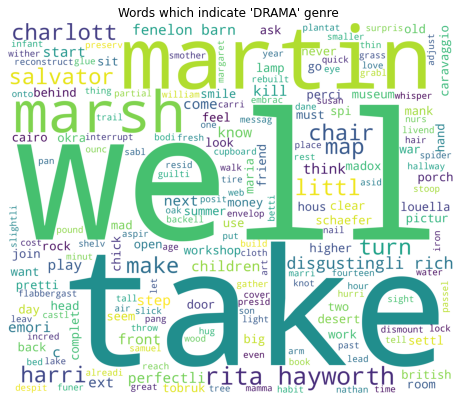

In [53]:
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

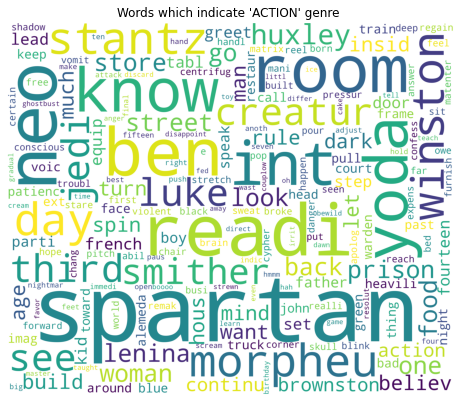

In [54]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

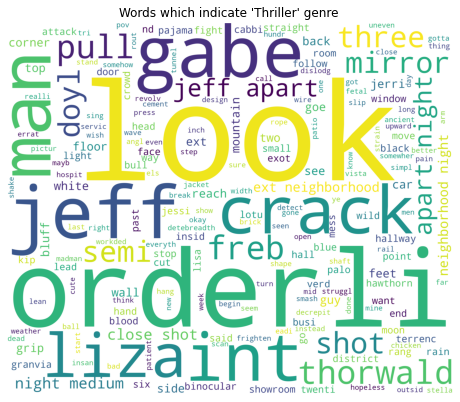

In [55]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(thriller)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'Thriller' genre ")
plt.show()

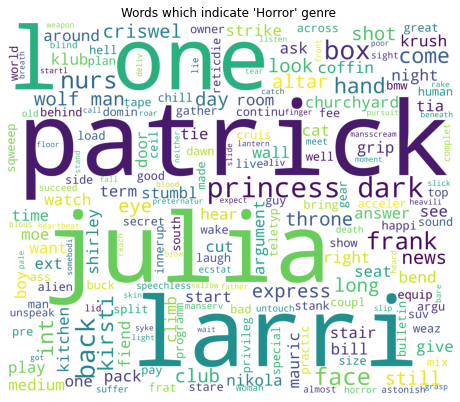

In [56]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(horror)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'Horror' genre ")
plt.show()

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [58]:
y = df['genre'].values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


In [60]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [61]:
nb_y_pred = nb_classifier.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [63]:
def genre_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

In [88]:
test = pd.read_csv('kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [89]:
test.shape

(5589, 2)

In [90]:
test.drop('id', axis=1, inplace=True)

In [91]:
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: e have to die?! Wynn restrains him. Pulls him away. The sheriff doesn't budge. WYNN Don't do this to yourself, Sam. Let's go. Come on. Wynn ushers Loomis out of the room. Holdt stares apathetically. HALLWAY CONTINUOUS Wynn tries to calm Loomis down. Jamie's doctor approaches. DR. BONHAM Dr. Loomis? WYNN What is it? DR. BONHAM I'm very sorry ... LOOMIS You let it get to her. How could you? DR. BONHAM Dr. Loomis, there's something else you should know. During surgery, we discovered that Jamie's uterus was hemorrhaging. We found this. displays a small vital It's placental fluid. LOOMIS God in heaven. You don't tell me she was DR. BONHAM I estimate she gave birth no more than a few hours before the attack. WYNN Then where's her baby? Jamie's covered body is wheeled out past them. Loomis regards Wynn with a look of abject fear. LOOMIS I think I may already know ... CUT TO INT. TOMMY'S APARTMENT SAME CLOSE ON a chapter heading. Thorn The Devil's Rune. Beneath it, a bold depiction of 

In [87]:
newscore= score1*100

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([89.0704163, 89.1704163, 89.2704163, 89.3704163, 89.4704163,
        89.5704163, 89.6704163, 89.7704163, 89.8704163, 89.9704163,
        90.0704163]),
 <BarContainer object of 10 artists>)

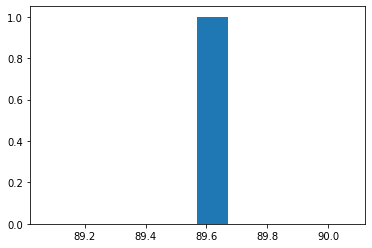

In [83]:
plt.hist(newscore)

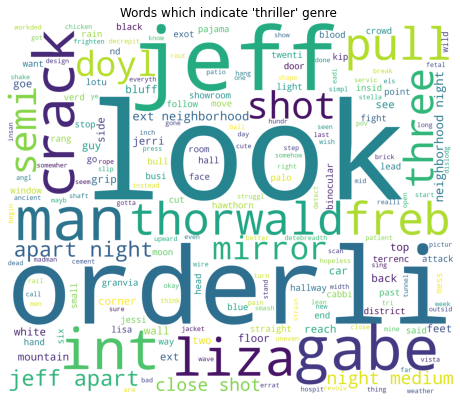

In [92]:
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(thriller)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'thriller' genre ")
plt.show()